In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf




In [2]:
df = pd.read_csv(r"C:\Users\Manoj M P\OneDrive\Desktop\mpg.csv")



In [3]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [4]:
print(df.columns)


Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')


In [5]:
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')
df = df.dropna()

In [6]:
X = df[['horsepower']]
y = df['mpg']

              mpg   cylinders  displacement  horsepower       weight  \
count  392.000000  392.000000    392.000000  392.000000   392.000000   
mean    23.445918    5.471939    194.411990  104.469388  2977.584184   
std      7.805007    1.705783    104.644004   38.491160   849.402560   
min      9.000000    3.000000     68.000000   46.000000  1613.000000   
25%     17.000000    4.000000    105.000000   75.000000  2225.250000   
50%     22.750000    4.000000    151.000000   93.500000  2803.500000   
75%     29.000000    8.000000    275.750000  126.000000  3614.750000   
max     46.600000    8.000000    455.000000  230.000000  5140.000000   

       acceleration  model_year      origin  
count    392.000000  392.000000  392.000000  
mean      15.541327   75.979592    1.576531  
std        2.758864    3.683737    0.805518  
min        8.000000   70.000000    1.000000  
25%       13.775000   73.000000    1.000000  
50%       15.500000   76.000000    1.000000  
75%       17.025000   79.0000

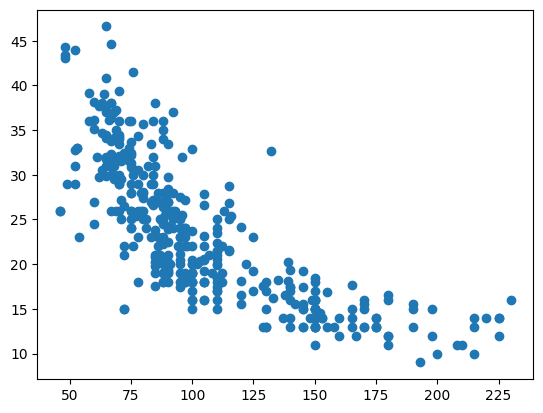

In [7]:
print(df.describe())
plt.scatter(df['horsepower'], df['mpg'])
plt.show()

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("\nTraining data size:", X_train.shape)
print("Testing data size:", X_test.shape)


NameError: name 'train_test_split' is not defined

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)
pred1 = model.predict(X_test)

r2_1 = r2_score(y_test, pred1)
print("\nScikit-learn R2 Score:", r2_1)


Scikit-learn R2 Score: 0.5659681822256185


In [ ]:
model2 = smf.ols("mpg ~ horsepower", data=df).fit()
print("\nFormula Model Summary:")
print(model2.summary())

pred2 = model2.predict(X_test)
r2_2 = r2_score(y_test, pred2)
print("Formula R2 Score:", r2_2)


Formula Model Summary:
                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Tue, 17 Feb 2026   Prob (F-statistic):           7.03e-81
Time:                        15:36:30   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.9359      0

In [ ]:
# Gradient Descent
X_train_gd = np.c_[np.ones(X_train.shape[0]), X_train]
X_test_gd = np.c_[np.ones(X_test.shape[0]), X_test]

theta = np.zeros(2)
lr = 0.0001

for _ in range(1000):
    pred = X_train_gd.dot(theta)
    error = pred - y_train
    grad = (1/len(X_train_gd)) * X_train_gd.T.dot(error)
    theta = theta - lr * grad

pred3 = X_test_gd.dot(theta)
r2_3 = r2_score(y_test, pred3)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Get equation
intercept = model.intercept_
slope = model.coef_[0]

print("Linear Regression Equation:")
print("mpg =", intercept, "+", slope, "* horsepower")

# Predict
pred = model.predict(X_test)

# Accuracy
print("R2 Score:", r2_score(y_test, pred))


Linear Regression Equation:
mpg = 40.606097600118346 + -0.16259724322918453 * horsepower
R2 Score: 0.5659681822256185


In [ ]:
print("\nFinal Comparison:")
print(r2_1, r2_2, r2_3)



Final Comparison:
0.5659681822256185 0.5770365606377252 -2.7541466024125043
